# Assignment - Image Classification with CNNs
![CIFAR10](https://miro.medium.com/max/964/1*syyml8q8s1Yt-iEea5m1Ag.png)

[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) is a small toy data set for image classifaction. 

* It has 60k images from ten diffenrent classes (like car, airplane, horse,..)
* The RGB images are of size 32x32 pixels  

In [1]:
#import needed libs
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

#some vars to controll the training -> use them in your code
batch_size = 32
num_classes = 10 #fixed!
epochs = 10

# Get the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Task:
* visualize some sample images from different classes
* build and train the ***AlexNet*** CNN architecture from the lecture, use the following Keras layers:
    * overview: https://keras.io/api/layers/
    * 2d convolution: https://keras.io/api/layers/convolution_layers/convolution2d/
    * Fully Connected (=Matrix Multiplication MLP): https://keras.io/api/layers/core_layers/dense/
    * Pooling: https://keras.io/api/layers/pooling_layers/max_pooling2d/   
* use 'relu' functions for the non-linear activation -> https://keras.io/api/layers/activation_layers/relu/
* optimize the learning hyper-paramters to get the best  test accuracy

Visualization

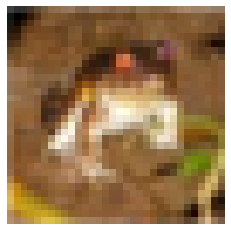

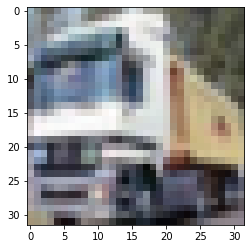

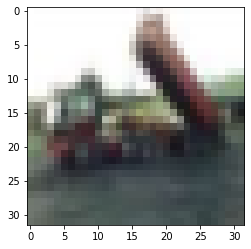

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.axis('off')
for i in range(3):
  img = x_train[i]
  plt.imshow(img)
  plt.show()


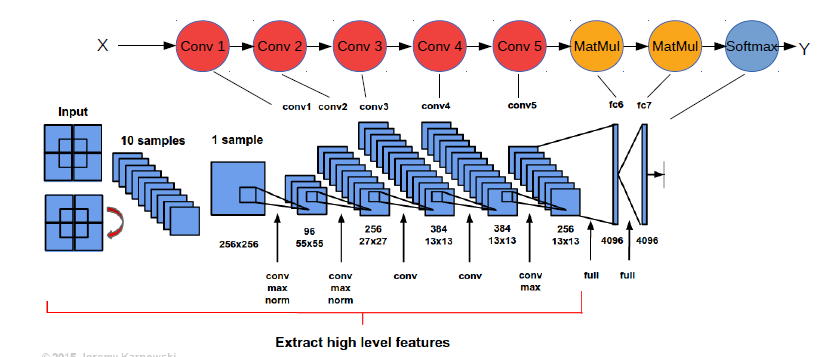

Training with **ALexNet**

In [4]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

# Build a simple model
inputs = keras.Input(shape=(32, 32, 3))
l1 = Rescaling(scale=1.0 / 255)(inputs)

l2 = layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=x_train.shape[1:])(l1)

l3 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding='same')(l2)
l4 = layers.MaxPooling2D(pool_size=(3, 3))(l3)

l5 = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same')(l4)
l6 = layers.MaxPooling2D(pool_size=(2, 2))(l5)

l7 = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same')(l6)
l8 = layers.MaxPooling2D(pool_size=(2, 2))(l7)

l9 = layers.Flatten()(l8)
l10 = layers.Dense(512, activation='relu')(l9)

outputs = layers.Dense(10, activation="softmax")(l10)
model = keras.Model(inputs, outputs)
model.summary()

# init optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0   

In [9]:
# Train the model 
%%time
batch_size = 32
epochs =  20
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True)
print(history.history)

Fit on NumPy data
Epoch 1/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2175 - accuracy: 0.9276
Epoch 2/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2065 - accuracy: 0.9307
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1961 - accuracy: 0.9345
Epoch 4/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1873 - accuracy: 0.9374
Epoch 5/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1780 - accuracy: 0.9412
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1678 - accuracy: 0.9462
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1600 - accuracy: 0.9476
Epoch 8/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1517 - accuracy: 0.9493
Epoch 9/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1437 - accuracy: 0.9531
Epoch 10/20
1563/1563 [==============================] 

### Evaluation

In [10]:
#evaluation
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


313/313 [==============================] - 2s 5ms/step - loss: 1.7614 - accuracy: 0.7241
Test loss: 1.761406660079956
Test accuracy: 0.7240999937057495


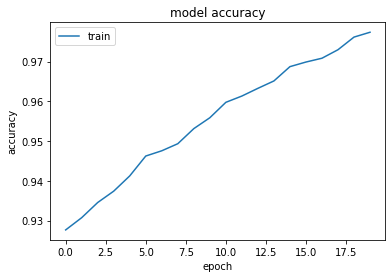

In [11]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

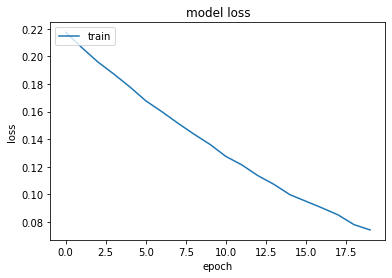

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()